In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
seed=123

In [13]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [14]:
def run_experiment(m1, m2, m3, m4, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3), Bandit(m4)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(4)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.plot(np.ones(N)*m4) 
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

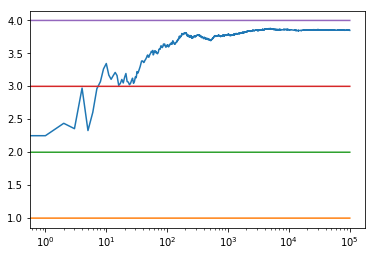

0.9823317206532284
2.0112045964262095
3.030795079064759
3.9967258775763703


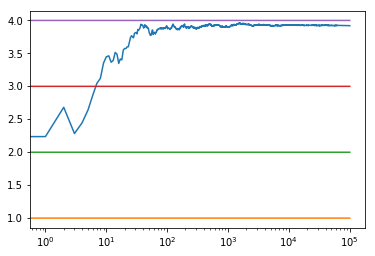

1.004525424962727
2.017346844263647
3.007989084023558
3.996115015585905


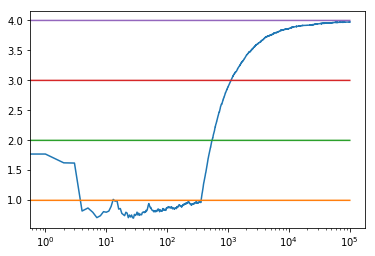

0.9406159674603224
1.940284250844268
2.9400837873117496
4.0012304331437205


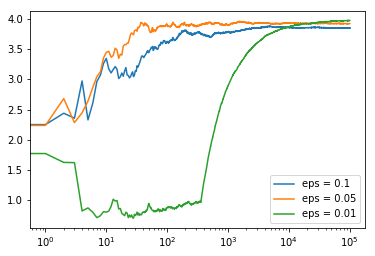

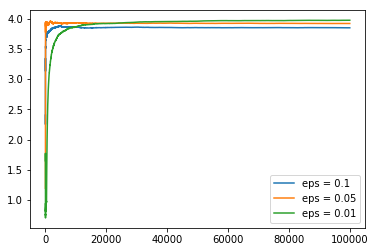

In [17]:
if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()
